<a href="https://colab.research.google.com/github/PHDieu661/Deep_Learning/blob/main/Implementation_of_neural_network_from_scratch_using_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Implementation

## Step 1 : Creating the Dataset Using NumPy Arrays of 0s and
1s
As the image is a collection of pixel values in matrix, we will create a
simple dataset for the letters A, B, and C using binary matrices. These
matrices represent pixel values of 5x6 grids for each letter.

In [ ]:
# Creating data set
# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]
# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]

## Step 2 : Visualizing the Dataset
To visualize the datasets, we can use Matplotlib to plot the images for
each letter. This will give us a clear understanding of what the data
looks like before feeding it into the neural network.

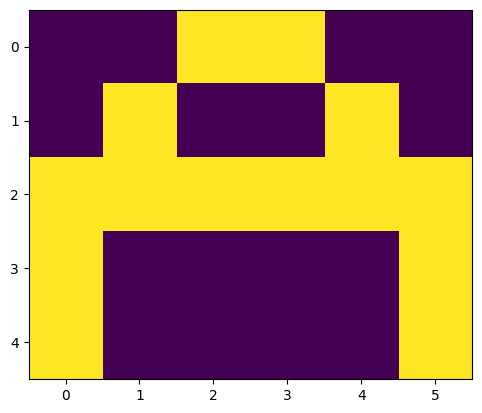

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()


## Step 3 : As the data set is in the form of list we will convert it into numpy array.
We convert the lists of pixel values and the corresponding labels into
NumPy arrays to work with them efficiently in the neural network.


In [ ]:
# converting data and labels into numpy array
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), np.array(c).reshape(1, 30)]
y = np.array(y)
# Printing data and labels
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


## Step 4: Defining the Architecture of the Neural Network
Our neural network will have the following structure:
* Input Layer: 1 layer with 30 nodes (representing the 5x6 grid).
* Hidden Layer: 1 layer with 5 nodes.
* Output Layer: 1 layer with 3 nodes (representing the letters A, B,
and C).


## Step 5: Defining the Neural Network Functions
Here, we will define the key components of the neural network:
print(x, "\n\n", y)
* Activation Function: We'll use the sigmoid activation function.
* Feedforward Process: Computes the output by passing the input
through the layers.
* Backpropagation: Updates weights to minimize the loss.
* Loss Function: We’ll use Mean Squared Error (MSE) to compute
the loss.


In [ ]:
# activation function
def sigmoid(x):
  return(1/(1 + np.exp(-x)))
# Creating the Feed forward neural network
def f_forward(x, w1, w2):
# hidden
  z1 = x.dot(w1) # input from layer 1
  a1 = sigmoid(z1) # out put of layer 2
  z2 = a1.dot(w2) # input of out layer
  a2 = sigmoid(z2) # output of out layer
  return(a2)
# initializing the weights randomly
def generate_wt(x, y):
  li =[]
  for i in range(x * y):
    li.append(np.random.randn())
  return(np.array(li).reshape(x, y))
# for loss we will be using mean square error(MSE)
def loss(out, Y):
  s =(np.square(out-Y))
  s = np.sum(s)/len(y)
  return(s)
# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
  # hidden layer
  z1 = x.dot(w1)
  a1 = sigmoid(z1)
  z2 = a1.dot(w2)
  a2 = sigmoid(z2)
  # error in output layer
  d2 =(a2-y)
  d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
  (np.multiply(a1, 1-a1)))
  # Gradient for w1 and w2
  w1_adj = x.transpose().dot(d1)
  w2_adj = a1.transpose().dot(d2)
  # Updating parameters
  w1 = w1-(alpha*(w1_adj))
  w2 = w2-(alpha*(w2_adj))
  return(w1, w2)


## Step 6: Initializing Weights
We initialize the weights for both the hidden layer and the output
layer randomly.

In [ ]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[ 0.25961943 -0.0683312   1.18815518 -0.25073403 -0.26430639]
 [ 0.69818716  0.07083314  1.06344867  0.29090428  0.50705165]
 [-0.53129142 -1.37048199 -0.26967712 -0.21211144 -1.02334214]
 [-0.57227161 -0.60847532  0.50644948 -0.65888005 -0.22575239]
 [ 1.52802431  0.61563665 -0.32126859 -0.14254931  1.0314472 ]
 [ 0.13939784  0.71283378 -0.33052643 -1.53037399 -0.41226409]
 [ 1.40512604 -0.69655138  0.35379861  1.30079916 -0.49902668]
 [ 0.13439185  0.32969483  1.50504422  0.31557944  0.83621971]
 [-0.02402937  0.03444418 -1.63435156  0.07588163  1.67559305]
 [-0.31866557  0.1988216   0.17921897  1.09876567 -0.83075338]
 [-1.30058456 -0.50236795  1.00143985 -1.04111045 -0.49959891]
 [-0.08501494  1.40776509  1.21144024  0.28005067  0.62861441]
 [-1.02966904 -0.17725729  0.33292626  1.18085596 -0.46609177]
 [ 0.11925054 -2.45417513 -0.59518337  0.72872345 -0.01864704]
 [ 1.42999104  1.55223051 -0.81524087  0.07983891  0.65860892]
 [ 0.79392002  0.69756401  0.018647    0.85682421 -0.44

## Step 7: Training the Model
Now that we've defined the structure, functions, and initialized the
weights, we can train the model using the train function. This function
will update the weights through backpropagation for a specified
number of epochs.

In [ ]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
  acc =[]
  losss =[]
  for j in range(epoch):
    l =[]
    for i in range(len(x)):
      out = f_forward(x[i], w1, w2)
      l.append((loss(out, Y[i])))
      w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
    print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
    acc.append((1-(sum(l)/len(x)))*100)
    losss.append(sum(l)/len(x))
  return(acc, losss, w1, w2)

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 63.57881804393089
epochs: 2 ======== acc: 66.33677220368209
epochs: 3 ======== acc: 69.18313114040204
epochs: 4 ======== acc: 72.08435496772245
epochs: 5 ======== acc: 75.03949576279054
epochs: 6 ======== acc: 78.0577451981419
epochs: 7 ======== acc: 80.73099340418459
epochs: 8 ======== acc: 82.66445501864128
epochs: 9 ======== acc: 84.07193479117036
epochs: 10 ======== acc: 85.19583912776481
epochs: 11 ======== acc: 86.14892196973149
epochs: 12 ======== acc: 86.98345367024679
epochs: 13 ======== acc: 87.7278476928017
epochs: 14 ======== acc: 88.40009585570064
epochs: 15 ======== acc: 89.01287353244985
epochs: 16 ======== acc: 89.575688783484
epochs: 17 ======== acc: 90.09591321290523
epochs: 18 ======== acc: 90.57935624602274
epochs: 19 ======== acc: 91.03063485160978
epochs: 20 ======== acc: 91.45343942106518
epochs: 21 ======== acc: 91.85073799603131
epochs: 22 ======== acc: 92.22493777238378
epochs: 23 ======== acc: 92.57801352866237
epochs: 24 ======== acc:

## Step 8: Plotting Accuracy and Loss
After training, we can visualize the accuracy and loss over the epochs
to understand the model's learning process.

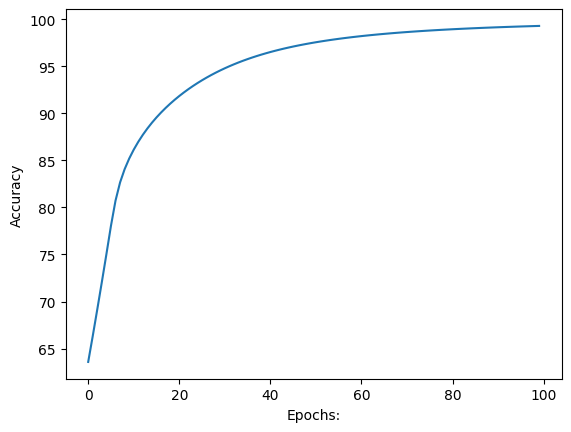

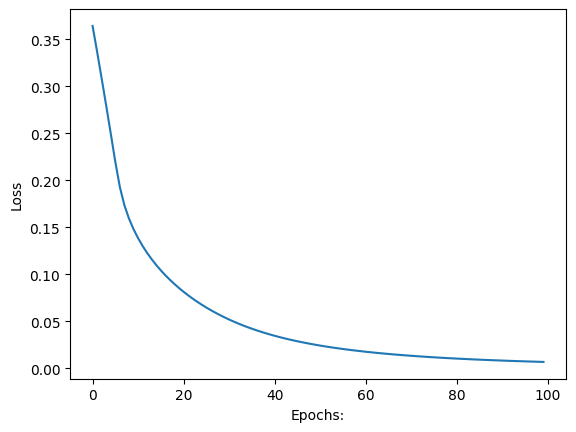

In [ ]:
import matplotlib.pyplot as plt1
# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()
# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

## Step 9: Making Predictions
We use the trained weights to predict the letter class for a new input.
The class with the highest output value is chosen as the predicted
class.

Image is of letter B.


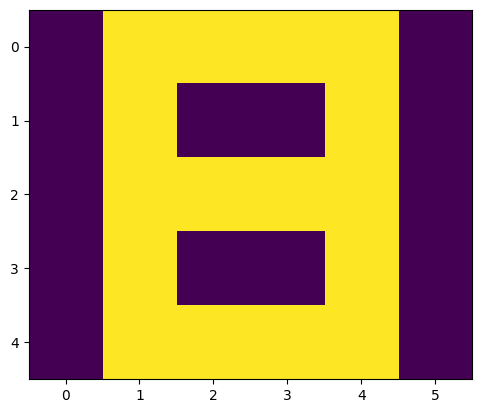

In [ ]:
def predict(x, w1, w2):
  Out = f_forward(x, w1, w2)
  maxm = 0
  k = 0
  for i in range(len(Out[0])):
    if(maxm<Out[0][i]):
      maxm = Out[0][i]
      k = i
  if(k == 0):
    print("Image is of letter A.")
  elif(k == 1):
    print("Image is of letter B.")
  else:
    print("Image is of letter C.")
  plt.imshow(x.reshape(5, 6))
  plt.show()
# Example: Predicting for letter 'B'
predict(x[1], w1, w2)